In [25]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Download the required NLTK data


In [2]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\samia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
# Load dataset
df = pd.read_csv('IMDBDataset.csv')


In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Exploratory Data Analysis (EDA)
This section provides insights into the dataset, including its structure, text distributions, and key patterns.

In [14]:
# Check for missing values
df.isnull().sum()

,0
review,0
sentiment,0


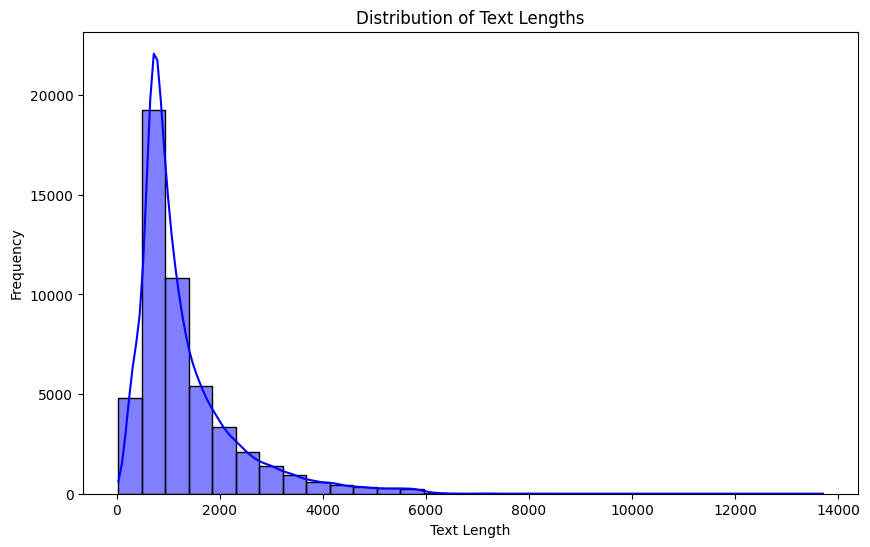

In [15]:
# Analyze text lengths (assuming a column named 'text')
df['text_length'] = df['review'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], kde=True, bins=30, color='blue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

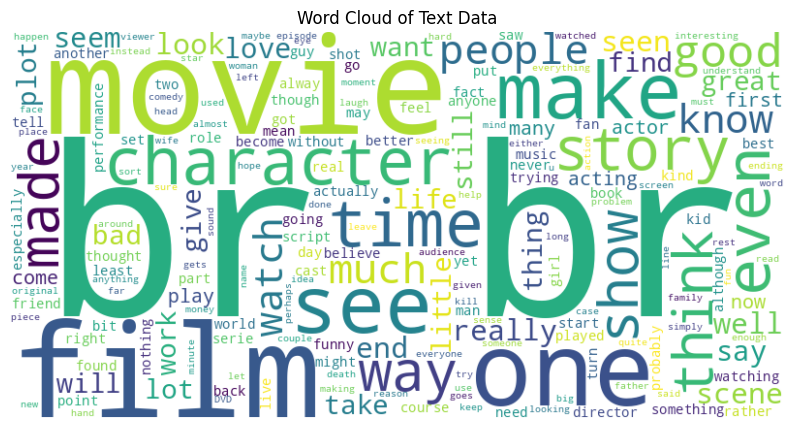

In [16]:
# Word Cloud Visualization (assuming a column named 'text')
all_text = ' '.join(df['review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()


In [5]:
import nltk

# Check the NLTK data path
print(nltk.data.path)

# If needed, set the path explicitly
nltk.data.path.append('/path/to/nltk_data')


['C:\\Users\\samia/nltk_data', 'c:\\Users\\samia\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data', 'c:\\Users\\samia\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data', 'c:\\Users\\samia\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data', 'C:\\Users\\samia\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


# Data Preprocessing

In [6]:
# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

 # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)


# Apply preprocessing
df['processed_text'] = df['review'].apply(preprocess_text)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data
df.replace({"sentiment":{"positive": 1, "negative": 0}}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


In [21]:
#  Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [88]:

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

# Evaluation function
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}\n")
    print(classification_report(y_test, y_pred))



In [89]:

evaluate_model(y_test, y_pred_nb, "Naive Bayes")


Naive Bayes Performance:
Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [27]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

Logistic Regression Performance:
Accuracy: 0.90
Precision: 0.89
Recall: 0.91
F1 Score: 0.90

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# NOW APPLYINH LSTM

In [84]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer

# Deep Learning Preprocessing
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100)
vocab_size = 10000 

In [31]:

# LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

lstm_model.build(input_shape=(None, 100))
lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

lstm_model.fit(X_train_seq, y_train, batch_size=32, epochs=10, validation_data=(X_test_seq, y_test))

Epoch 1/10
1250/1250 [==============================] - 79s 62ms/step - loss: 0.3997 - accuracy: 0.8187 - val_loss: 0.3114 - val_accuracy: 0.8637
Epoch 2/10
1250/1250 [==============================] - 74s 59ms/step - loss: 0.2869 - accuracy: 0.8815 - val_loss: 0.2980 - val_accuracy: 0.8695
Epoch 3/10
1250/1250 [==============================] - 76s 61ms/step - loss: 0.2339 - accuracy: 0.9077 - val_loss: 0.3032 - val_accuracy: 0.8737
Epoch 4/10
1250/1250 [==============================] - 76s 61ms/step - loss: 0.1940 - accuracy: 0.9237 - val_loss: 0.3725 - val_accuracy: 0.8612
Epoch 5/10
1250/1250 [==============================] - 76s 61ms/step - loss: 0.1586 - accuracy: 0.9400 - val_loss: 0.3557 - val_accuracy: 0.8639
Epoch 6/10
1250/1250 [==============================] - 76s 61ms/step - loss: 0.1292 - accuracy: 0.9517 - val_loss: 0.4013 - val_accuracy: 0.8587
Epoch 7/10
1250/1250 [==============================] - 76s 61ms/step - loss: 0.1086 - accuracy: 0.9609 - val_loss: 0.4158 -

In [85]:
# Add deep learning performance
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_seq, y_test)
print("\nLSTM Performance:")
print("Accuracy:", lstm_accuracy)
print("Test Loss:", lstm_loss)

y_pred_probs = lstm_model.predict(X_test_seq)
# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print(report)




313/313 [==============================] - 8s 24ms/step - loss: 0.5844 - accuracy: 0.8530

LSTM Performance:
Accuracy: 0.8529999852180481
Test Loss: 0.5843539834022522
313/313 [==============================] - 7s 22ms/step
              precision    recall  f1-score   support

    Negative       0.87      0.83      0.85      4961
    Positive       0.84      0.88      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# Now APPLYING RNN

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense



In [47]:
X_train_tfidf.shape

(40000, 5000)

In [81]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Define constants
vocab_size = 10000  # Maximum number of unique tokens
embedding_dim = 128  # Embedding vector size
max_len = 200  # Maximum sequence length

# Tokenize and pad the data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)  # X_train_raw should be your raw text data

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


In [50]:

# Define RNN Model
rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    SimpleRNN(units=128, activation='tanh', return_sequences=False),
    Dense(1, activation='sigmoid')
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN Model
rnn_history = rnn_model.fit(X_train_padded, y_train, epochs=8, batch_size=64, validation_data=(X_test_padded, y_test))

# Evaluate the RNN Model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_padded, y_test)
print(f"RNN Accuracy: {rnn_accuracy:.2f}")


Epoch 1/8
625/625 [==============================] - 48s 75ms/step - loss: 0.6992 - accuracy: 0.4999 - val_loss: 0.6957 - val_accuracy: 0.5030
Epoch 2/8
625/625 [==============================] - 47s 76ms/step - loss: 0.6940 - accuracy: 0.5166 - val_loss: 0.6945 - val_accuracy: 0.5090
Epoch 3/8
625/625 [==============================] - 47s 75ms/step - loss: 0.6805 - accuracy: 0.5476 - val_loss: 0.6989 - val_accuracy: 0.5197
Epoch 4/8
625/625 [==============================] - 48s 77ms/step - loss: 0.6600 - accuracy: 0.5680 - val_loss: 0.7153 - val_accuracy: 0.5243
Epoch 5/8
625/625 [==============================] - 47s 75ms/step - loss: 0.6359 - accuracy: 0.5852 - val_loss: 0.7140 - val_accuracy: 0.5243
Epoch 6/8
625/625 [==============================] - 47s 76ms/step - loss: 0.6270 - accuracy: 0.6014 - val_loss: 0.7230 - val_accuracy: 0.5395
Epoch 7/8
625/625 [==============================] - 47s 75ms/step - loss: 0.5998 - accuracy: 0.6168 - val_loss: 0.7334 - val_accuracy: 0.5428

In [82]:
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_padded, y_test)
print("\nRNN Performance:")
print("Accuracy:", rnn_accuracy)
print("Test Loss:", rnn_loss)

y_pred_probs = rnn_model.predict(X_test_padded)
# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print(report)



313/313 [==============================] - 4s 13ms/step - loss: 0.7726 - accuracy: 0.5449

RNN Performance:
Accuracy: 0.5449000000953674
Test Loss: 0.77264803647995
313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

    Negative       0.60      0.24      0.35      4961
    Positive       0.53      0.84      0.65      5039

    accuracy                           0.54     10000
   macro avg       0.57      0.54      0.50     10000
weighted avg       0.57      0.54      0.50     10000



# NOW APPLYING CNN

In [75]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Define constants
vocab_size = 10000  # Maximum number of unique tokens
embedding_dim = 128  # Embedding vector size
max_len = 200  # Maximum sequence length

# Tokenize and pad the data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)  # X_train_raw should be your raw text data

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [55]:


# Define CNN Model
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN Model
cnn_history = cnn_model.fit(X_train_padded, y_train, epochs=8, batch_size=64, validation_data=(X_test_padded, y_test))

# Evaluate the CNN Model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_padded, y_test)
print(f"CNN Accuracy: {cnn_accuracy:.2f}")


Epoch 1/8
625/625 [==============================] - 38s 60ms/step - loss: 0.3794 - accuracy: 0.8193 - val_loss: 0.2679 - val_accuracy: 0.8862
Epoch 2/8
625/625 [==============================] - 37s 60ms/step - loss: 0.1726 - accuracy: 0.9360 - val_loss: 0.2721 - val_accuracy: 0.8907
Epoch 3/8
625/625 [==============================] - 38s 60ms/step - loss: 0.0472 - accuracy: 0.9866 - val_loss: 0.3482 - val_accuracy: 0.8889
Epoch 4/8
625/625 [==============================] - 38s 61ms/step - loss: 0.0068 - accuracy: 0.9991 - val_loss: 0.4546 - val_accuracy: 0.8879
Epoch 5/8
625/625 [==============================] - 38s 61ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4613 - val_accuracy: 0.8909
Epoch 6/8
625/625 [==============================] - 38s 61ms/step - loss: 2.5595e-04 - accuracy: 1.0000 - val_loss: 0.4881 - val_accuracy: 0.8928
Epoch 7/8
625/625 [==============================] - 38s 61ms/step - loss: 1.2640e-04 - accuracy: 1.0000 - val_loss: 0.5105 - val_accuracy

In [90]:
cnnloss, cnn_accuracy = cnn_model.evaluate(X_test_padded, y_test)
print("\nCNN Performance:")
print("Accuracy:", cnn_accuracy)
print("Test Loss:", cnn_loss)
y_pred_probs = cnn_model.predict(X_test_padded)
# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print(report)

313/313 [==============================] - 2s 8ms/step - loss: 0.5301 - accuracy: 0.8922

CNN Performance:
Accuracy: 0.8921999931335449
Test Loss: 0.5301072001457214
313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

    Negative       0.90      0.89      0.89      4961
    Positive       0.89      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# SO LOGESTIC REGRESSION PERFORMS WELL With highest Accuracy




# Topic Modeling

In [191]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns


In [193]:

# Step 1: Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Step 2: Load the dataset
# Replace with your file path if running locally
df = pd.read_csv('IMDBDataset.csv')  # Use your actual dataset path in Colab or local
print("Dataset loaded successfully!")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset loaded successfully!


In [194]:
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\samia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [195]:
print("Sample data:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nClass distribution:")
print(df['sentiment'].value_counts())
df['processed_text'] = df['review'].apply(preprocess_text)

Sample data:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

Class distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [196]:
df['sentiment']

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [197]:

# Step 4: Preprocess the text
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(tokens)

print("Preprocessing the reviews...")
df['processed_review'] = df['review'].apply(preprocess_text)
print("Text preprocessing complete!")

Preprocessing the reviews...
Text preprocessing complete!


In [198]:
# Step 5: Convert sentiment to binary labels
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['processed_review'], df['sentiment'], test_size=0.2, random_state=42)


In [199]:
y_test

33553    1
9427     1
199      0
12447    1
39489    0
        ..
28567    0
25079    1
18707    1
15200    0
5857     1
Name: sentiment, Length: 10000, dtype: int64

In [200]:
# Step 7: Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
doc_term_matrix = tfidf.fit_transform(df['processed_review'])

In [201]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Discover 5 topics
lda.fit(X_train_tfidf)

LatentDirichletAllocation(n_components=5, random_state=42)

In [202]:
# Step 11: Display top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic #{topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

print("\nTop Words for Each Topic:")
display_topics(lda, tfidf.get_feature_names_out(), 5)


Top Words for Each Topic:

Topic #1:
brain, moving, fighting, likely, baker

Topic #2:
brain, showdown, entire, moving, online

Topic #3:
brain, fighting, moving, lifetime, ward

Topic #4:
brain, fighting, moving, online, character

Topic #5:
brain, fighting, moving, online, granted


In [203]:
%pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [204]:
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

In [205]:
# import pyLDAvis.sklearn


vis = pyLDAvis.lda_model.prepare(lda, doc_term_matrix, tfidf)
pyLDAvis.display(vis)
pyLDAvis.save_html(vis, 'lda_vis.html')

In [206]:
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns
import matplotlib.pyplot as plt

In [207]:
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
# Step 10: Topic Modeling using Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Discover 5 topics
lda.fit(X_train_tfidf)

# Step 11: Display top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic #{topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

print("\nTop Words for Each Topic:")
display_topics(lda, tfidf.get_feature_names_out(), 10)



Top Words for Each Topic:

Topic #1:
brain, moving, fighting, likely, baker, online, gold, reasonable, wound, eugene

Topic #2:
brain, showdown, entire, moving, online, seriously, second, likely, fighting, function

Topic #3:
brain, fighting, moving, lifetime, ward, online, stranded, people, tiny, worn

Topic #4:
brain, fighting, moving, online, character, likely, stranded, scene, gold, tiny

Topic #5:
brain, fighting, moving, online, granted, performance, stranded, character, lover, rolled


In [211]:
df["sentiment"]

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

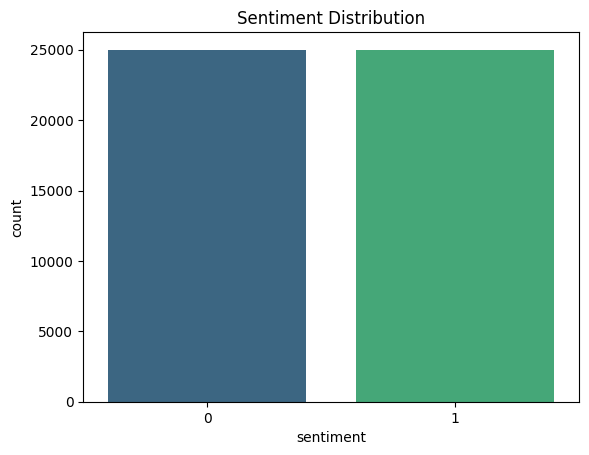

In [212]:
# Step 12: Visualizations
# Sentiment distribution visualization
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title("Sentiment Distribution")
plt.show()


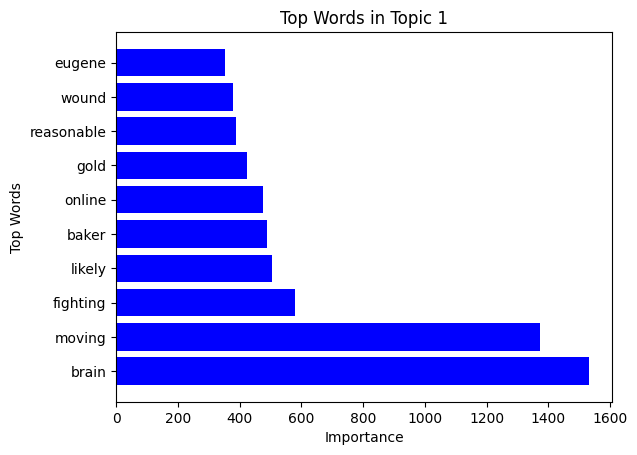

In [213]:
# Visualize the most important words for the first topic
topic_0 = lda.components_[0]
top_words_indices = topic_0.argsort()[-10:][::-1]  # Correct order for top words
top_words = [tfidf.get_feature_names_out()[i] for i in top_words_indices]
top_words_values = topic_0[top_words_indices]

plt.barh(top_words, top_words_values, color='blue')
plt.xlabel("Importance")
plt.ylabel("Top Words")
plt.title("Top Words in Topic 1")
plt.show()